In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## ✅ Step 1: Load the Dataset
import pandas as pd

# Column names as per dataset description
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
           'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# Load the dataset
df = pd.read_csv('C:/Users/User/Downloads/abalone/abalone.data', header=None, names=columns)

# Check the first few rows
print(df.head(20))


   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    M   0.455     0.365   0.095        0.5140          0.2245   
1    M   0.350     0.265   0.090        0.2255          0.0995   
2    F   0.530     0.420   0.135        0.6770          0.2565   
3    M   0.440     0.365   0.125        0.5160          0.2155   
4    I   0.330     0.255   0.080        0.2050          0.0895   
5    I   0.425     0.300   0.095        0.3515          0.1410   
6    F   0.530     0.415   0.150        0.7775          0.2370   
7    F   0.545     0.425   0.125        0.7680          0.2940   
8    M   0.475     0.370   0.125        0.5095          0.2165   
9    F   0.550     0.440   0.150        0.8945          0.3145   
10   F   0.525     0.380   0.140        0.6065          0.1940   
11   M   0.430     0.350   0.110        0.4060          0.1675   
12   M   0.490     0.380   0.135        0.5415          0.2175   
13   F   0.535     0.405   0.145        0.6845          0.2725   
14   F   0

In [4]:
## Step 2: Explore the Data
# Data types
print(df.dtypes)

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings 

In [5]:
##Step 3: Preprocess the Data
# One-hot encode the 'Sex' column
df_encoded = pd.get_dummies(df, columns=['Sex'])

# Confirm encoding
print(df_encoded.head())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15  False  False   True  
1         0.070      7  False  False   True  
2         0.210      9   True  False  False  
3         0.155     10  False  False   True  
4         0.055      7  False   True  False  


In [6]:
# Step 5: Prepare features and target

# Convert Rings to Age
df_encoded['Age'] = df['Rings'] + 1.5

print(df_encoded.head())

print(df_encoded.dtypes)


   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M   Age  
0         0.150     15  False  False   True  16.5  
1         0.070      7  False  False   True   8.5  
2         0.210      9   True  False  False  10.5  
3         0.155     10  False  False   True  11.5  
4         0.055      7  False   True  False   8.5  
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Sex_F            

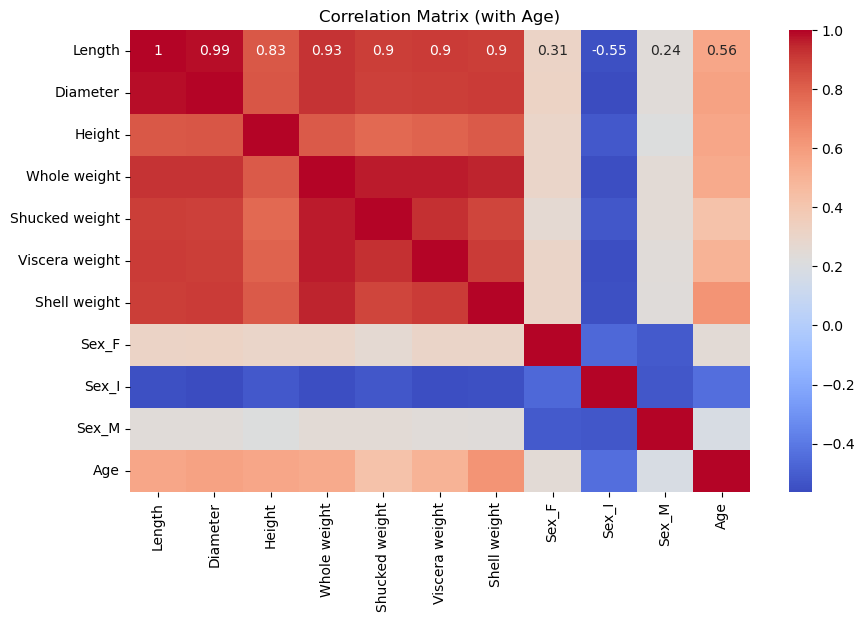

<Figure size 640x480 with 0 Axes>

In [7]:
# Step : Explore and Correlation Check

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.drop(columns='Rings').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (with Age)')
plt.show()
plt.savefig('corr_heatmap1.png', transparent=True)

In [8]:
# Step 6: Prepare Features and Target
X = df_encoded.drop(columns=['Rings', 'Age', 'Sex_F','Sex_M','Sex_I','Diameter'])  # Features
y = df_encoded['Age']                          # Target


In [9]:
# Step 7: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [10]:
# Step 8: KNN Regression
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN -> RMSE: {rmse_knn:.2f}, R²: {r2_knn:.2f}")


KNN -> RMSE: 2.13, R²: 0.54


In [11]:
# Step 9: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression -> RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")


Linear Regression -> RMSE: 2.22, R²: 0.50


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your data and target
model = LinearRegression()
model.fit(X_train, y_train)

# Getting feature importance (absolute values of coefficients)
importance = np.abs(model.coef_)

# Optionally, if you want to sort the features by importance:
feature_importance = sorted(zip(X_train.columns, importance), key=lambda x: x[1], reverse=True)
print(feature_importance)


[('Shucked weight', 20.394336878284435), ('Height', 11.530263165111828), ('Shell weight', 9.818989136324493), ('Viscera weight', 9.219670051125114), ('Whole weight', 9.121940265941014), ('Length', 8.368476637117405)]


In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

best_k = 1
best_score = float('inf')  # Lower MSE is better

for k in range(1, 31):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = mean_squared_error(y_test, predictions)
    
    if score < best_score:
        best_score = score
        best_k = k

print(f"Best k: {best_k}")
print(f"Lowest MSE: {best_score}")


Best k: 13
Lowest MSE: 4.542227003765465
